In [1]:
import json
import generate_figures as gf

batch_file = '../data/json/cedar_batch_total_dedicated_nt_4d.json'
pilots8_file = '../data/json/cedar_pilots8_total_dedicated_nt_4d.json'
pilots16_file = '../data/json/cedar_pilots16_total_dedicated_nt_4d.json'

gf.batch = gf.load_json(batch_file)
gf.pilots8 = gf.load_json(pilots8_file)
gf.pilots16 = gf.load_json(pilots16_file)

In [2]:
#get makespans
assert(len(gf.batch)==len(gf.pilots8)==len(gf.pilots16))

dedicated_1 = gf.makespan_dict()
dedicated_2 = gf.makespan_dict()
dedicated_3 = gf.makespan_dict()
dedicated_4 = gf.makespan_dict()

gf.fill_dictionaries()
        

## FIGURE 0 - RAW

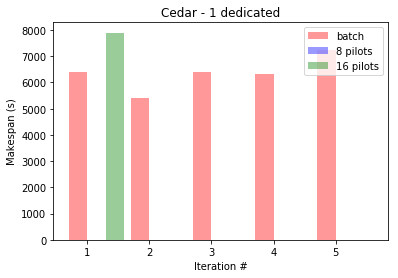

In [3]:
## 1 dedicated
gf.iteration_fig(gf.dedicated_1, 1, system="Cedar")

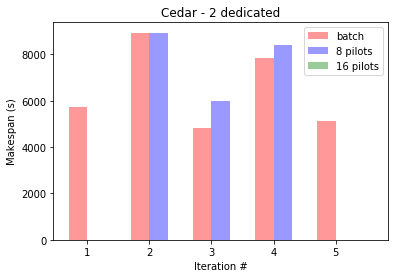

In [4]:
## 2 dedicated
gf.iteration_fig(gf.dedicated_2, 2, system="Cedar")

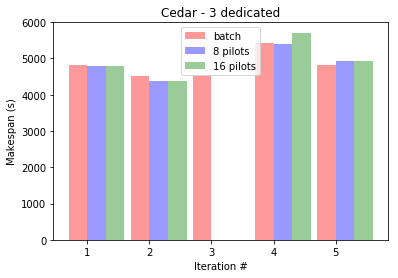

In [5]:
## 3 dedicated
gf.iteration_fig(gf.dedicated_3, 3, system="Cedar")

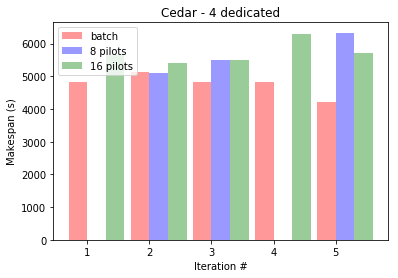

In [6]:
## 4 dedicated
gf.iteration_fig(gf.dedicated_4, 4, system="Cedar")

## FIGURE 1 - Makespan difference

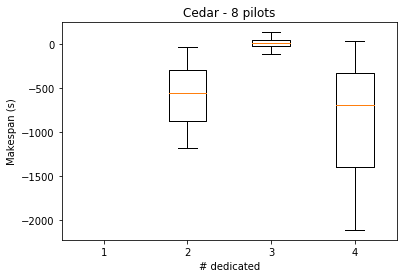

In [7]:
gf.makespan_box(gf.dedicated_1, gf.dedicated_2,
                gf.dedicated_3, gf.dedicated_4, 8, system="Cedar")

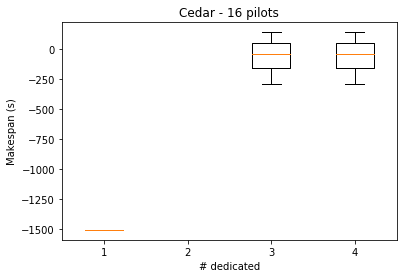

In [8]:
gf.makespan_box(gf.dedicated_1, gf.dedicated_2,
                gf.dedicated_3, gf.dedicated_3, 16, system="Cedar")

## Figure 2 - Queuing time difference

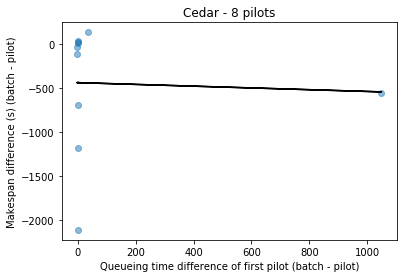

In [9]:
# Beluga 8 pilots
qxlabel = "Queueing time difference of first pilot (batch - pilot)"
qylabel = "Makespan difference (s) (batch - pilot)"

gf.scatter_fig(*gf.makespan_queue(8), num_pilots=8,
               xlabel=qxlabel, ylabel=qylabel, system="Cedar")


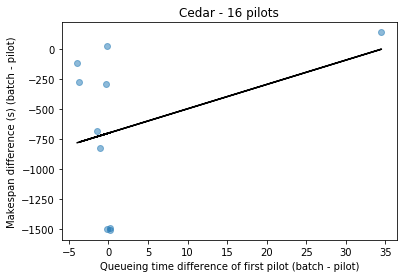

In [10]:
#Beluga 16 pilots
gf.scatter_fig(*gf.makespan_queue(16), num_pilots=16,
               xlabel=qxlabel, ylabel=qylabel, system="Cedar")

## Figure 3A - Average number of nodes

In [11]:
avgn_8pilots = [gf.get_pilot_avgnodes(job, gf.batch[idx])
                for idx, job in enumerate(gf.pilots8)
                if job['success']
                and job['end_time'] is not None
                and gf.batch[idx]['success']]
avgn_16pilots = [gf.get_pilot_avgnodes(job, gf.batch[idx])
                 for idx, job in enumerate(gf.pilots16)
                 if job['success']
                 and job['end_time'] is not None
                 and gf.batch[idx]['success']]
avgn_batch = [gf.get_batch_avgnodes(job)
              for job in gf.batch 
              if job['success'] and job['end_time'] is not None]

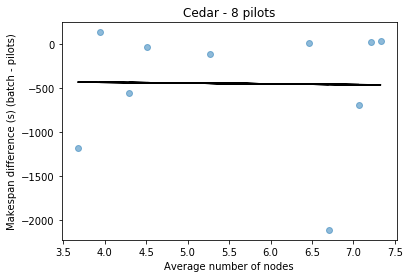

In [12]:
# 8 pilots
as_xlbl = "Average number of {}"
as_ylbl = "Makespan difference (s) (batch - pilots)"
gf.scatter_fig([i[0] for i in avgn_8pilots],
               [i[1] for i in avgn_8pilots], 8,
               xlabel=as_xlbl.format("nodes"),
               ylabel=as_ylbl, system="Cedar")

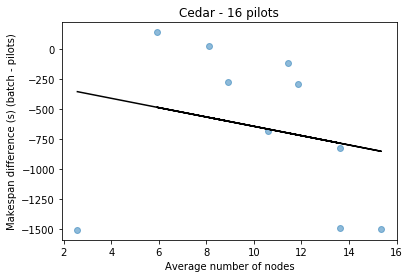

In [13]:
# 16 pilots
gf.scatter_fig([i[0] for i in avgn_16pilots],
               [i[1] for i in avgn_16pilots], 16,
               xlabel=as_xlbl.format("nodes"),
               ylabel=as_ylbl, system="Cedar")

## Figure 3B - Average number of pilots

In [14]:
avgp_8pilots = [gf.get_avgpilots(job, gf.batch[idx])
               for idx, job in enumerate(gf.pilots8)
               if job['success']
                and job['end_time'] is not None
                and gf.batch[idx]['success']]
avgp_16pilots = [gf.get_avgpilots(job, gf.batch[idx])
                for idx, job in enumerate(gf.pilots16)
                if job['success']
                 and job['end_time'] is not None
                 and gf.batch[idx]['success']]

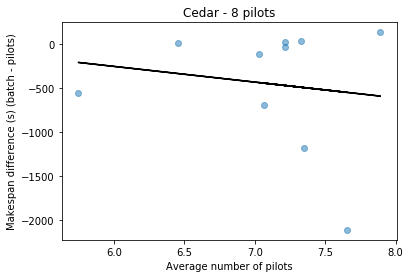

In [15]:
# 8 pilots
gf.scatter_fig([i[0] for i in avgp_8pilots],
               [i[1] for i in avgp_8pilots], 8,
               xlabel=as_xlbl.format("pilots"),
               ylabel=as_ylbl, system="Cedar")

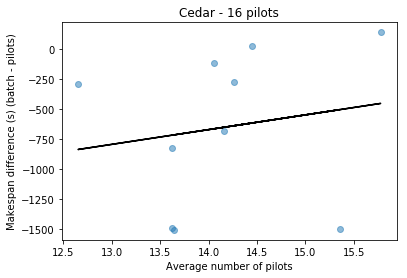

In [16]:
gf.scatter_fig([i[0] for i in avgp_16pilots],
               [i[1] for i in avgp_16pilots], 16,
               xlabel=as_xlbl.format("pilots"),
               ylabel=as_ylbl, system="Cedar")

In [17]:
batch_pilots8 = [el for el in list(zip(gf.batch, gf.pilots8))
                 if el[0]['success'] and el[1]['success']]

m1_m2_b8 = [(el[0]['end_time'] - el[0]['start_time'])
            / (el[1]['end_time'] - el[1]['start_time'])
            for el in batch_pilots8]

batch_aworkers = [(gf.get_batch_avgw(el[0])[0])
                     for el in batch_pilots8]
pilots8_aworkers = [(gf.get_pilot_avgw(el[1], el[0])[0])
                      for el in batch_pilots8]

w2_w1_b8 = [el[1] / el[0] for el in zip(batch_aworkers,
                                        pilots8_aworkers)]


In [18]:

batch_pilots16 = list(zip(gf.batch, gf.pilots16))
m1_m2_b16 = [(el[0]['end_time'] - el[0]['start_time'])
             / (el[1]['end_time'] - el[1]['start_time'])
            for el in batch_pilots16
             if el[0]['success'] and el[1]['success']]

w2_w1_b16 = [(gf.get_pilot_avgw(el[1], el[0])[0]
             / (gf.get_batch_avgw(el[0])[0]))
            for el in batch_pilots16
            if el[0]['success'] and el[1]['success']]

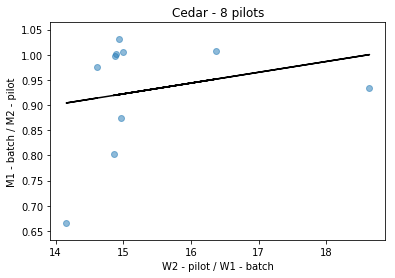

In [19]:
# 8 pilots
bm_x_lbl= "W2 - pilot / W1 - batch"
bm_y_lbl= "M1 - batch / M2 - pilot"
gf.scatter_fig(w2_w1_b8, m1_m2_b8, 8, bm_x_lbl, bm_y_lbl,
               system="Cedar")

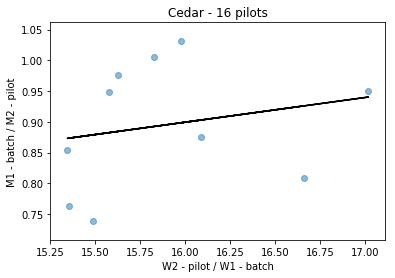

In [20]:
# 16 pilots
gf.scatter_fig(w2_w1_b16, m1_m2_b16, 16, bm_x_lbl, bm_y_lbl,
               system="Cedar")

In [166]:
import numpy as np
def basic_model(xy1, xy2, xy3, xy4, num_pilots, xlabel, ylabel, system="Beluga", save=None):   
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots()                                                     
    ax.scatter(xy1[0], xy1[1], c="purple", alpha=0.5)                                                  
    ax.scatter(xy2[0], xy2[1], c="red", alpha=0.5)
    ax.scatter(xy3[0], xy3[1], c="orange", alpha=0.5)
    ax.scatter(xy4[0], xy4[1], c="green", alpha=0.5)
    
    get_c = lambda x, y, z=False: (10*(x+20)*125)/y if z else 10*(x+20)*np.ceil(125/y)
    if type(num_pilots) == str:
        ceil_results = True
    else:
        ceil_results=False
    n_workers = np.arange(16, 70)
    
    a = 0.3
    ax.plot(n_workers, get_c(45, n_workers, ceil_results),'+', c='purple', alpha=a)
    ax.plot(n_workers, get_c(90, n_workers, ceil_results), '+', c='red', alpha=a)
    ax.plot(n_workers, get_c(120, n_workers, ceil_results), '+', c='orange', alpha=a)
    ax.plot(n_workers, get_c(180, n_workers, ceil_results), '+', c='green', alpha=a)
    
    print(get_c(45, n_workers, ceil_results))

    
    #b, m = np.polynomial.polynomial.polyfit(x, y, 1)                             
    #ax.plot(np.asarray(x), b + m*np.asarray(x), 'k-')                            
    ax.set_xlabel(xlabel)                                                        
    ax.set_ylabel(ylabel)                                                        
                                                                                 
    if save is None:                                                             
        ax.set_title('{0} - {1} pilots'.format(system, num_pilots))              
        plt.show()                                                               
    else:                                                                        
        plt.savefig(save)  

In [167]:
m_batch_1d = [el['end_time'] - el['start_time']
              for el in gf.batch if el['success']
             and "single" in el['name']]

w_batch_1d = [el['worker_count']
               for el in gf.batch if el['success']
               and "single" in el['name']]
m_batch_2d = [el['end_time'] - el['start_time']
              for el in gf.batch if el['success']
             and "double" in el['name']]

w_batch_2d = [el['worker_count']
               for el in gf.batch if el['success']
               and "double" in el['name']]

m_batch_3d = [el['end_time'] - el['start_time']
              for el in gf.batch if el['success']
             and "triple" in el['name']]

w_batch_3d = [el['worker_count']
               for el in gf.batch if el['success']
               and "triple" in el['name']]

m_batch_4d = [el['end_time'] - el['start_time']
              for el in gf.batch if el['success']
             and "quadruple" in el['name']]

w_batch_4d = [el['worker_count']
               for el in gf.batch if el['success']
               and "quadruple" in el['name']]

[5078.125      4779.41176471 4513.88888889 4276.31578947 4062.5
 3869.04761905 3693.18181818 3532.60869565 3385.41666667 3250.
 3125.         3009.25925926 2901.78571429 2801.72413793 2708.33333333
 2620.96774194 2539.0625     2462.12121212 2389.70588235 2321.42857143
 2256.94444444 2195.94594595 2138.15789474 2083.33333333 2031.25
 1981.70731707 1934.52380952 1889.53488372 1846.59090909 1805.55555556
 1766.30434783 1728.72340426 1692.70833333 1658.16326531 1625.
 1593.1372549  1562.5        1533.01886792 1504.62962963 1477.27272727
 1450.89285714 1425.43859649 1400.86206897 1377.11864407 1354.16666667
 1331.96721311 1310.48387097 1289.68253968 1269.53125    1250.
 1231.06060606 1212.68656716 1194.85294118 1177.53623188]


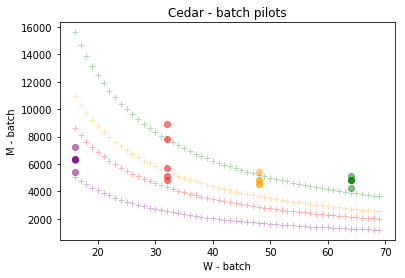

In [168]:
basic_model((w_batch_1d, m_batch_1d),
             (w_batch_2d, m_batch_2d),
             (w_batch_3d, m_batch_3d), (w_batch_4d, m_batch_4d),"batch",
               "W - batch", "M - batch",
               system="Cedar")

In [169]:
m_8p_1d = [(el['end_time'] - el['start_time'])
            for el in gf.pilots8 if el['success']
          and '1d' in el['name']]

w_8p_1d = [el['worker_count']
            for el in gf.pilots8 if el['success']
           and '1d' in el['name']]

m_8p_2d = [(el['end_time'] - el['start_time'])
            for el in gf.pilots8 if el['success']
          and '2d' in el['name']]

w_8p_2d = [el['worker_count']
            for el in gf.pilots8 if el['success']
           and '2d' in el['name']]
m_8p_3d = [(el['end_time'] - el['start_time'])
            for el in gf.pilots8 if el['success']
          and '3d' in el['name']]

w_8p_3d = [el['worker_count']
            for el in gf.pilots8 if el['success']
           and '3d' in el['name']]

m_8p_4d = [(el['end_time'] - el['start_time'])
            for el in gf.pilots8 if el['success']
          and '4d' in el['name']]

w_8p_4d = [el['worker_count']
            for el in gf.pilots8 if el['success']
           and '4d' in el['name']]

[5200. 5200. 4550. 4550. 4550. 3900. 3900. 3900. 3900. 3250. 3250. 3250.
 3250. 3250. 3250. 3250. 2600. 2600. 2600. 2600. 2600. 2600. 2600. 2600.
 2600. 2600. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950.
 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1300.
 1300. 1300. 1300. 1300. 1300. 1300.]


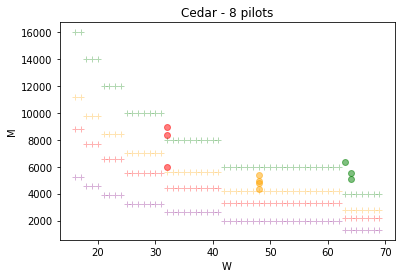

In [170]:
basic_model((w_8p_1d, m_8p_1d),
            (w_8p_2d, m_8p_2d),
            (w_8p_3d, m_8p_3d), (w_8p_4d, m_8p_4d), 8,
               "W", "M",
               system="Cedar")

In [171]:
m_16p_1d = [(el['end_time'] - el['start_time'])
        for el in gf.pilots16 if el['success']
           and '1d' in el['name']]
w_16p_1d = [el['worker_count']
            for el in gf.pilots16 if el['success']
           and '1d' in el['name']]
m_16p_2d = [(el['end_time'] - el['start_time'])
        for el in gf.pilots16 if el['success']
           and '2d' in el['name']]
w_16p_2d = [el['worker_count']
            for el in gf.pilots16 if el['success']
           and '2d' in el['name']]
m_16p_3d = [(el['end_time'] - el['start_time'])
        for el in gf.pilots16 if el['success']
           and '3d' in el['name']]
w_16p_3d = [el['worker_count']
            for el in gf.pilots16 if el['success']
           and '3d' in el['name']]
m_16p_4d = [(el['end_time'] - el['start_time'])
        for el in gf.pilots16 if el['success']
           and '4d' in el['name']]
w_16p_4d = [el['worker_count']
            for el in gf.pilots16 if el['success']
           and '4d' in el['name']]



[5200. 5200. 4550. 4550. 4550. 3900. 3900. 3900. 3900. 3250. 3250. 3250.
 3250. 3250. 3250. 3250. 2600. 2600. 2600. 2600. 2600. 2600. 2600. 2600.
 2600. 2600. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950.
 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1950. 1300.
 1300. 1300. 1300. 1300. 1300. 1300.]


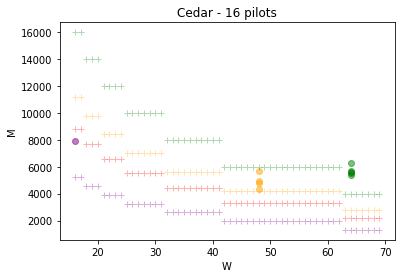

In [172]:
basic_model((w_16p_1d, m_16p_1d),
                (w_16p_2d, m_16p_2d),
                (w_16p_3d, m_16p_3d), (w_16p_4d, m_16p_4d), 16,
               "W", "M",
               system="Cedar")

In [173]:
gf.batch

[{'name': 'batch_single',
  'timestamp': '2019-04-23T15:39:21.375069',
  'start_time': 1556059161.375099,
  'end_time': 1556065551.510284,
  'success': True,
  'worker_count': 16,
  'sid': [{'id': 20067200,
    'start_time': 1556060255.5966773,
    'end_time': 1556065489.3963575,
    'nodes': {'172.16.138.212': ['40090',
      '36494',
      '42382',
      '43418',
      '46544',
      '33259',
      '41967',
      '37527',
      '46113',
      '46056',
      '33742',
      '42376',
      '44712',
      '33132',
      '38265',
      '35476']},
    'succeeded': True}]},
 {'name': 'batch_quadruple',
  'timestamp': '2019-04-23T17:51:07.272618',
  'start_time': 1556067067.2726657,
  'end_time': 1556071883.1502476,
  'success': True,
  'worker_count': 64,
  'sid': [{'id': 20072037,
    'start_time': 1556067777.746838,
    'end_time': 1556071846.67356,
    'nodes': {'172.16.137.234': ['35514',
      '36523',
      '41320',
      '40476',
      '41007',
      '43981',
      '40504',
      '36